In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


- Does the level of noise affect a user’s rating?

In [2]:
bus_data = pd.read_csv("data/yelp_academic_dataset_business.csv")
#user_data = pd.read_csv("data/")

/var/folders/fr/191hgtd5661_x52pstt85l580000gn/T/ipykernel_69812/3785873816.py:1: DtypeWarning: Columns (1,29) have mixed types. Specify dtype option on import or set low_memory=False.
  bus_data = pd.read_csv("data/yelp_academic_dataset_business.csv")


In [3]:
bus_data

,attributes.WiFi,attributes.Open24Hours,hours.Saturday,attributes.GoodForKids,attributes.NoiseLevel,attributes.GoodForDancing,name,city,attributes.RestaurantsTableService,attributes.HappyHour,...,attributes.Alcohol,attributes.DogsAllowed,attributes,latitude,attributes.RestaurantsPriceRange2,attributes.ByAppointmentOnly,attributes.Caters,stars,longitude,attributes.HasTV
0,NaN,NaN,NaN,NaN,NaN,NaN,"Abby Rappoport, LAC, CMQ",Santa Barbara,NaN,NaN,...,NaN,NaN,{'ByAppointmentOnly': 'True'},34.426679,NaN,True,NaN,5.0,-119.711197,NaN
1,NaN,NaN,8:0-14:0,NaN,NaN,NaN,The UPS Store,Affton,NaN,NaN,...,NaN,NaN,{'BusinessAcceptsCreditCards': 'True'},38.551126,NaN,NaN,NaN,3.0,-90.335695,NaN
2,u'no',NaN,8:0-23:0,NaN,NaN,NaN,Target,Tucson,NaN,False,...,NaN,False,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",32.223236,2,False,False,3.5,-110.880452,False
3,u'free',NaN,7:0-21:0,NaN,NaN,NaN,St Honore Pastries,Philadelphia,NaN,NaN,...,u'none',NaN,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...",39.955505,1,False,True,4.0,-75.155564,NaN
4,NaN,NaN,12:0-22:0,True,NaN,NaN,Perkiomen Valley Brewery,Green Lane,NaN,NaN,...,NaN,NaN,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...",40.338183,NaN,NaN,False,4.5,-75.471659,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,NaN,NaN,10:0-17:30,NaN,NaN,NaN,Binh's Nails,Edmonton,NaN,NaN,...,NaN,NaN,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...",53.468419,3,False,NaN,3.0,-113.492054,NaN
150342,u'no',NaN,9:0-17:0,NaN,NaN,NaN,Wild Birds Unlimited,Nashville,NaN,NaN,...,NaN,NaN,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",36.115118,2,NaN,NaN,4.0,-86.766925,NaN
150343,NaN,NaN,NaN,NaN,NaN,NaN,Claire's Boutique,Indianapolis,NaN,NaN,...,NaN,NaN,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...",39.908707,1,NaN,NaN,3.5,-86.065088,NaN
150344,NaN,NaN,9:0-17:0,NaN,NaN,NaN,Cyclery & Fitness Center,Edwardsville,NaN,NaN,...,NaN,NaN,"{'BusinessParking': ""{'garage': False, 'street...",38.782351,4,NaN,NaN,4.0,-89.950558,NaN


In [4]:
list(bus_data)

['attributes.WiFi',
 'attributes.Open24Hours',
 'hours.Saturday',
 'attributes.GoodForKids',
 'attributes.NoiseLevel',
 'attributes.GoodForDancing',
 'name',
 'city',
 'attributes.RestaurantsTableService',
 'attributes.HappyHour',
 'hours.Sunday',
 'attributes.BestNights',
 'attributes.RestaurantsGoodForGroups',
 'hours.Wednesday',
 'attributes.RestaurantsTakeOut',
 'hours',
 'hours.Monday',
 'hours.Thursday',
 'attributes.BusinessParking',
 'attributes.RestaurantsAttire',
 'business_id',
 'postal_code',
 'review_count',
 'categories',
 'attributes.AcceptsInsurance',
 'attributes.Smoking',
 'attributes.DietaryRestrictions',
 'attributes.WheelchairAccessible',
 'attributes.RestaurantsDelivery',
 'attributes.RestaurantsCounterService',
 'state',
 'hours.Friday',
 'attributes.Ambience',
 'hours.Tuesday',
 'attributes.AgesAllowed',
 'attributes.BikeParking',
 'attributes.BYOB',
 'attributes.Music',
 'address',
 'attributes.OutdoorSeating',
 'attributes.BusinessAcceptsCreditCards',
 'attrib

In [5]:
bus_data['attributes.NoiseLevel'].unique()

array([nan, "u'average'", "u'quiet'", "'average'", "u'loud'",
       "u'very_loud'", "'quiet'", "'very_loud'", "'loud'", 'None'],
      dtype=object)

In [6]:
bus_data['business_id'].count() #all have unique business ids

150346

In [7]:
bus_data['attributes.NoiseLevel'].count()

37993

In [8]:
bus_data[bus_data['attributes.NoiseLevel']=='average'].count()

attributes.WiFi                          0
attributes.Open24Hours                   0
hours.Saturday                           0
attributes.GoodForKids                   0
attributes.NoiseLevel                    0
attributes.GoodForDancing                0
name                                     0
city                                     0
attributes.RestaurantsTableService       0
attributes.HappyHour                     0
hours.Sunday                             0
attributes.BestNights                    0
attributes.RestaurantsGoodForGroups      0
hours.Wednesday                          0
attributes.RestaurantsTakeOut            0
hours                                    0
hours.Monday                             0
hours.Thursday                           0
attributes.BusinessParking               0
attributes.RestaurantsAttire             0
business_id                              0
postal_code                              0
review_count                             0
categories 

In [9]:
bus_data.categories

0         Doctors, Traditional Chinese Medicine, Naturop...
1         Shipping Centers, Local Services, Notaries, Ma...
2         Department Stores, Shopping, Fashion, Home & G...
3         Restaurants, Food, Bubble Tea, Coffee & Tea, B...
4                                 Brewpubs, Breweries, Food
                                ...                        
150341                           Nail Salons, Beauty & Spas
150342    Pets, Nurseries & Gardening, Pet Stores, Hobby...
150343    Shopping, Jewelry, Piercing, Toy Stores, Beaut...
150344    Fitness/Exercise Equipment, Eyewear & Optician...
150345    Beauty & Spas, Permanent Makeup, Piercing, Tattoo
Name: categories, Length: 150346, dtype: object

In [13]:
bar.index

Float64Index([4.0, 4.5, 3.5, 3.0, 5.0, 2.5, 2.0, 1.5, 1.0], dtype='float64')

In [14]:
bar.values

array([31125, 27181, 26519, 18453, 16307, 14316,  9527,  4932,  1986])

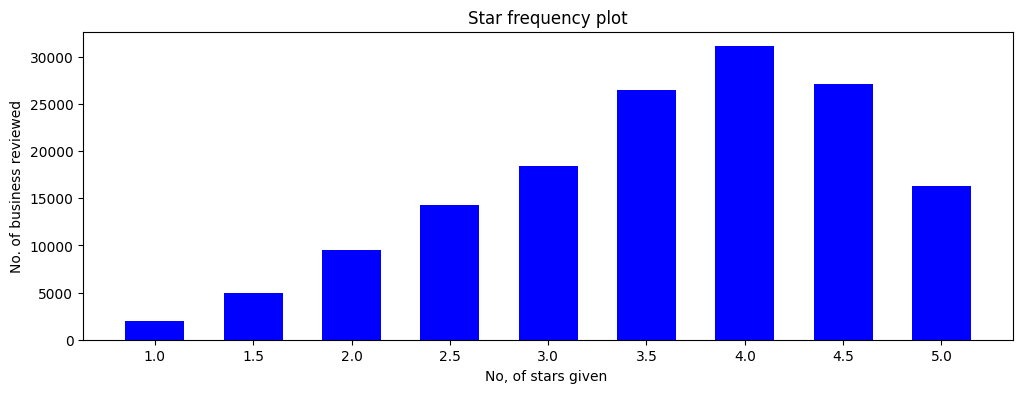

In [48]:
#Get the distribution of the ratings
bar = dict(bus_data['stars'].value_counts())
new_bar = dict()
for i, j in bar.items():
    new_bar[str(i)] = j

new_bar = dict(sorted(new_bar.items()))
#bar = bar.sort_index()
#plot
plt.figure(figsize=(12,4))
# plt.bar(bar.index - 0.2, bar.values, 0.2, color='red')
plt.bar(list(new_bar.keys()), list(new_bar.values()), 0.6, color='blue')
plt.title("Star frequency plot")
plt.ylabel('No. of business reviewed')
plt.xlabel('No, of stars given ')
plt.show()


In [49]:
noise_levels = bus_data['attributes.NoiseLevel'].value_counts().index
noise_levels #type LIST

Index(['u'average'', 'u'quiet'', ''average'', 'u'loud'', ''quiet'',
       'u'very_loud'', ''loud'', ''very_loud'', 'None'],
      dtype='object')

In [50]:
noise_levels_count = bus_data['attributes.NoiseLevel'].value_counts().values

In [51]:
bus_data['attributes.NoiseLevel'].value_counts().index

Index(['u'average'', 'u'quiet'', ''average'', 'u'loud'', ''quiet'',
       'u'very_loud'', ''loud'', ''very_loud'', 'None'],
      dtype='object')

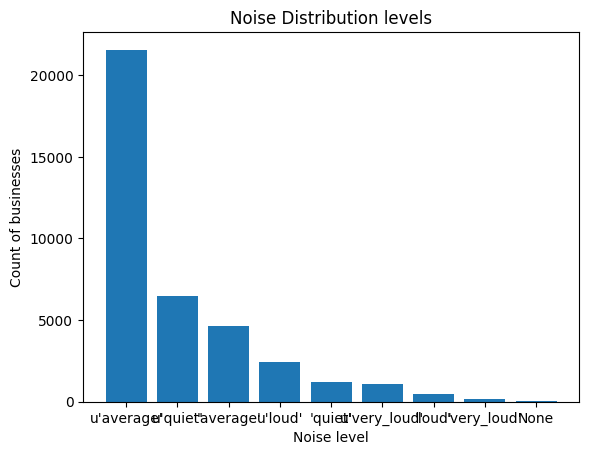

In [52]:
plt.bar(noise_levels, noise_levels_count)
plt.title("Noise Distribution levels")
plt.ylabel('Count of businesses')
plt.xlabel('Noise level')
plt.show()

In [53]:
#read user file
review_data = pd.read_csv("data/yelp_academic_dataset_review.csv")

In [54]:
review_data.head()  #5996996 rows × 9 columns

,stars,useful,text,user_id,review_id,business_id,funny,date,cool
0,3.0,0,"If you decide to eat here, just be aware it is...",mh_-eMZ6K5RLWhZyISBhwA,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,0,2018-07-07 22:09:11,0
1,5.0,1,I've taken a lot of spin classes over the year...,OyoGAe7OKpv6SyGZT5g77Q,BiTunyQ73aT9WBnpR9DZGw,7ATYjTIgM3jUlt4UM3IypQ,0,2012-01-03 15:28:18,1
2,3.0,0,Family diner. Had the buffet. Eclectic assortm...,8g_iMtfSiwikVnbP2etR0A,saUsX_uimxRlCVr67Z4Jig,YjUWPpI6HXG530lwP-fb2A,0,2014-02-05 20:30:30,0
3,5.0,1,"Wow! Yummy, different, delicious. Our favo...",_7bHUi9Uuf5__HHc_Q8guQ,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,0,2015-01-04 00:01:03,1
4,4.0,1,Cute interior and owner (?) gave us tour of up...,bcjbaE6dDog4jkNY91ncLQ,Sx8TMOWLNuJBWer-0pcmoA,e4Vwtrqf-wpJfwesgvdgxQ,0,2017-01-14 20:54:15,1


In [55]:
# in review.csv multiple users give review(stars,rating) to businesses
# we need to find whether there is any co-relation between user's ratings and the business noise levels
# 1. find the ratings given for each business

In [56]:
len(review_data.business_id.unique())

150346

In [57]:
review_data_2 = review_data.copy()

In [58]:
review_data_2 = review_data_2.drop(['useful', 'funny','cool','review_id' ,'user_id','text','date'], axis=1)

In [59]:
review_data_2.groupby(['business_id'])['stars'].agg('count')

business_id
---kPU91CF4Lq2-WlRu9Lw    24
--0iUa4sNDFiZFrAdIWhZQ    14
--30_8IhuyMHbSOcNWd6DQ     9
--7PUidqRWpRSpXebiyxTg    12
--7jw19RH9JKXgFohspgQw    13
                          ..
zznZqH9CiAznbkV6fXyHWA    12
zztOG2cKm87I6Iw_tleZsQ     6
zzu6_r3DxBJuXcjnOYVdTw     8
zzw66H6hVjXQEt0Js3Mo4A     5
zzyx5x0Z7xXWWvWnZFuxlQ     8
Name: stars, Length: 150346, dtype: int64

In [60]:
review_data_3 = review_data_2.pivot_table(index='business_id', columns='stars',  aggfunc=len, fill_value=0)

In [61]:
review_data_3

stars,1.0,2.0,3.0,4.0,5.0
business_id,,,,,
---kPU91CF4Lq2-WlRu9Lw,1,0,2,4,17
--0iUa4sNDFiZFrAdIWhZQ,3,0,4,5,2
--30_8IhuyMHbSOcNWd6DQ,3,0,0,1,5
--7PUidqRWpRSpXebiyxTg,7,2,2,1,0
--7jw19RH9JKXgFohspgQw,2,0,1,0,10
...,...,...,...,...,...
zznZqH9CiAznbkV6fXyHWA,0,0,0,1,11
zztOG2cKm87I6Iw_tleZsQ,0,0,0,1,5
zzu6_r3DxBJuXcjnOYVdTw,0,1,2,4,1


In [62]:
# %%time
# review_data_star_pivot = review_data_2.pivot_table(index = 'business_id', columns = 'stars', aggfunc = sum)

In [63]:
#review_data_star_pivot

In [64]:
#now get a list of business ids , corresponding noise levels and avg. stars

In [65]:
# bus_data[bus_data['business_id']=='--1UhMGODdWsrMastO9DZw']

In [66]:
bus_data_2 = bus_data[['business_id','stars','attributes.NoiseLevel']]
bus_data_2

,business_id,stars,attributes.NoiseLevel
0,Pns2l4eNsfO8kk83dixA6A,5.0,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,3.0,NaN
2,tUFrWirKiKi_TAnsVWINQQ,3.5,NaN
3,MTSW4McQd7CbVtyjqoe9mw,4.0,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,4.5,NaN
...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,3.0,NaN
150342,c8GjPIOTGVmIemT7j5_SyQ,4.0,NaN
150343,_QAMST-NrQobXduilWEqSw,3.5,NaN
150344,mtGm22y5c2UHNXDFAjaPNw,4.0,NaN


In [67]:
bus_data_2 = bus_data_2.dropna()

In [68]:
bus_data_2

,business_id,stars,attributes.NoiseLevel
8,k0hlBqXX-Bt0vf1op7Jr1w,3.0,u'average'
14,0bPLkL0QhhPO5kt1_EXmNQ,4.5,u'average'
15,MUTTqe8uqyMdBl186RmNeA,4.0,u'average'
19,ROeacJQwBeh05Rqg7F6TCg,4.5,u'quiet'
20,WKMJwqnfZKsAae75RMP6jA,4.0,u'average'
...,...,...,...
150321,AM7O0cwkxm6w_e0Q7-f9FQ,4.0,u'average'
150322,2MAQeAqmD8enCT2ZYqUgIQ,4.0,u'average'
150323,w_4xUt-1AyY2ZwKtnjW0Xg,4.5,u'average'
150327,cM6V90ExQD6KMSU3rRB5ZA,4.0,u'loud'


In [69]:
bus_merge_noise_star = pd.merge(bus_data_2, review_data_3, on=['business_id'], how='inner')
bus_merge_noise_star.head()

,business_id,stars,attributes.NoiseLevel,1.0,2.0,3.0,4.0,5.0
0,k0hlBqXX-Bt0vf1op7Jr1w,3.0,u'average',6,2,1,7,3
1,0bPLkL0QhhPO5kt1_EXmNQ,4.5,u'average',8,4,1,19,74
2,MUTTqe8uqyMdBl186RmNeA,4.0,u'average',14,12,29,50,145
3,ROeacJQwBeh05Rqg7F6TCg,4.5,u'quiet',4,6,28,52,118
4,WKMJwqnfZKsAae75RMP6jA,4.0,u'average',2,2,5,23,8


In [71]:
bus_merge_noise_star.columns = ['business_id', 'avg_stars','NoiseLevel'
                                ,'star_1','star_2','star_3','star_4','star_5']

In [72]:
bus_merge_noise_star

,business_id,avg_stars,NoiseLevel,star_1,star_2,star_3,star_4,star_5
0,k0hlBqXX-Bt0vf1op7Jr1w,3.0,u'average',6,2,1,7,3
1,0bPLkL0QhhPO5kt1_EXmNQ,4.5,u'average',8,4,1,19,74
2,MUTTqe8uqyMdBl186RmNeA,4.0,u'average',14,12,29,50,145
3,ROeacJQwBeh05Rqg7F6TCg,4.5,u'quiet',4,6,28,52,118
4,WKMJwqnfZKsAae75RMP6jA,4.0,u'average',2,2,5,23,8
...,...,...,...,...,...,...,...,...
37988,AM7O0cwkxm6w_e0Q7-f9FQ,4.0,u'average',5,1,3,5,16
37989,2MAQeAqmD8enCT2ZYqUgIQ,4.0,u'average',16,18,18,52,109
37990,w_4xUt-1AyY2ZwKtnjW0Xg,4.5,u'average',44,37,100,284,569
37991,cM6V90ExQD6KMSU3rRB5ZA,4.0,u'loud',8,2,0,3,21


In [83]:
quiet_stars = bus_merge_noise_star[bus_merge_noise_star['NoiseLevel']=='u\'quiet\'']['avg_stars']
avg_noise_stars = bus_merge_noise_star[bus_merge_noise_star['NoiseLevel']=='u\'average\'']['avg_stars']
loud_stars = bus_merge_noise_star[bus_merge_noise_star['NoiseLevel']=='u\'loud\'']['avg_stars']
very_loud_stars = bus_merge_noise_star[bus_merge_noise_star['NoiseLevel']=='u\'very_loud\'']['avg_stars']
type(quiet_stars)

pandas.core.series.Series

In [84]:
print("length - quiet, avg_noise, loud, very_lod", len(quiet_stars), " ", len(avg_noise_stars), " "
     , len(loud_stars), " ", len(very_loud_stars), " ")

length - quiet, avg_noise, loud, very_lod 6460   21581   2447   1067  


In [85]:
np.mean(np.array(quiet_stars.tolist()))

3.645046439628483

In [86]:
np.mean(np.array(avg_noise_stars.tolist()))

3.6015244891339604

In [87]:
np.mean(np.array(loud_stars.tolist()))

3.3093583980384143

In [88]:
np.mean(np.array(very_loud_stars.tolist()))

3.020618556701031

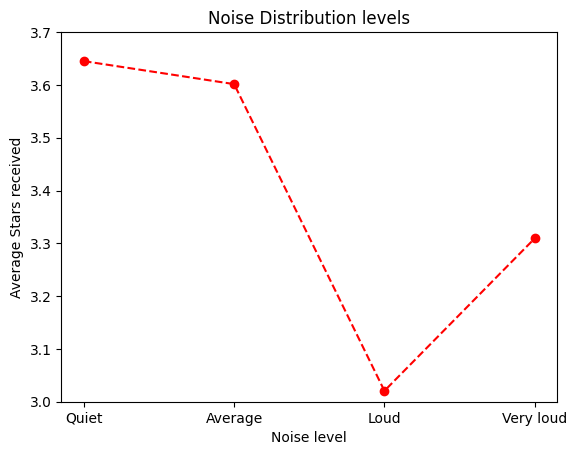

In [93]:
plt.plot( ['Quiet','Average','Loud','Very loud'] , [np.mean(np.array(quiet_stars.tolist())),
                                                    np.mean(np.array(avg_noise_stars.tolist())),
                                                    np.mean(np.array(very_loud_stars.tolist())),
                                                    np.mean(np.array(loud_stars.tolist()))] 
        ,'--ro')
plt.title("Noise Distribution levels")
plt.ylabel('Average Stars received')
plt.xlabel('Noise level')

axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([3,3.7])

plt.show()

(future topic) Who tends to give less rating: men or women?